In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('diamonds.csv')

# Basic overview
print(df.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53947 non-null  int64  
 1   carat       53947 non-null  float64
 2   cut         53944 non-null  object 
 3   color       53946 non-null  object 
 4   clarity     53947 non-null  object 
 5   depth       53946 non-null  float64
 6   table       53947 non-null  float64
 7   price       53947 non-null  int64  
 8   x           53947 non-null  float64
 9   y           53947 non-null  float64
 10  z           53947 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB
None


In [27]:
print(df.describe())

         Unnamed: 0         carat         depth         table         price  \
count  53947.000000  53947.000000  53946.000000  53947.000000  53947.000000   
mean   26973.000000      0.797936     61.749271     57.457143   3932.614158   
std    15573.301823      0.473981      1.432571      2.234418   3989.233934   
min        0.000000      0.200000     43.000000     43.000000   -200.000000   
25%    13486.500000      0.400000     61.000000     56.000000    950.000000   
50%    26973.000000      0.700000     61.800000     57.000000   2401.000000   
75%    40459.500000      1.040000     62.500000     59.000000   5324.000000   
max    53946.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y  
count  53947.000000  53947.000000  
mean       5.731181      5.734549  
std        1.121691      1.142063  
min        0.000000      0.000000  
25%        4.710000      4.720000  
50%        5.700000      5.710000  
75%        6.540000      6.540000  


In [28]:
# Check for missing values
print(df.isna().sum())

Unnamed: 0    0
carat         0
cut           3
color         1
clarity       0
depth         1
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [29]:
# Check unique values for categorical columns
print(df['cut'].value_counts())
print(df['color'].value_counts())
print(df['clarity'].value_counts())

cut
Ideal        21549
Premium      13792
Very Good    12081
Good          4906
Fair          1610
ideal            4
very good        1
premium          1
Name: count, dtype: int64
color
G     11293
E      9799
F      9543
H      8304
D      6776
I      5422
J      2808
87        1
Name: count, dtype: int64
clarity
SI1     13064
VS2     12259
SI2      9198
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
8           1
7y          1
vs2         1
Name: count, dtype: int64


## Data Cleaning

In [30]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Check for zero or negative values in dimensions
print("\nRows with zero dimensions:")
print(f"x = 0: {(df['x'] == 0).sum()}")
print(f"y = 0: {(df['y'] == 0).sum()}")
print(f"z = 0: {(df['z'] == 0).sum()}")

# Check unique values in categorical columns
print("\nUnique values in 'cut':")
print(df['cut'].value_counts())


Missing values:
Unnamed: 0    0
carat         0
cut           3
color         1
clarity       0
depth         1
table         0
price         0
x             0
y             0
z             0
dtype: int64

Number of duplicate rows: 0

Rows with zero dimensions:
x = 0: 8
y = 0: 7
z = 0: 0

Unique values in 'cut':
cut
Ideal        21549
Premium      13792
Very Good    12081
Good          4906
Fair          1610
ideal            4
very good        1
premium          1
Name: count, dtype: int64


## Fix Capitalization

In [31]:
# Standardize categorical columns (fix capitalization issue)
df['cut'] = df['cut'].str.title()  # Capitalizes first letter of each word
df['color'] = df['color'].str.upper()
df['clarity'] = df['clarity'].str.upper()

# Verify the fix
print("Cleaned cut values:")
print(df['cut'].value_counts())

Cleaned cut values:
cut
Ideal        21553
Premium      13793
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


## Remove Invalid Dimensions

In [32]:
# Convert all numeric columns to proper numeric type
numeric_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

print("Converting columns to numeric type:")
for col in numeric_columns:
    print(f"  {col}: {df[col].dtype} -> ", end="")
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(f"{df[col].dtype}")

# Check if any conversions created NaN values
print("\nNaN values after conversion:")
print(df[numeric_columns].isna().sum())

Converting columns to numeric type:
  carat: float64 -> float64
  depth: float64 -> float64
  table: float64 -> float64
  price: int64 -> int64
  x: float64 -> float64
  y: float64 -> float64
  z: object -> float64

NaN values after conversion:
carat    0
depth    1
table    0
price    0
x        0
y        0
z        1
dtype: int64


In [33]:
# Check how many rows have invalid dimensions
invalid_dims = len(df[(df['x'] <= 0) | (df['y'] <= 0) | (df['z'] <= 0)])
print(f"Removing {invalid_dims} rows with invalid dimensions")

# Remove rows with zero or negative dimensions
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

print(f"Dataset shape after removing invalid dimensions: {df.shape}")

Removing 20 rows with invalid dimensions
Dataset shape after removing invalid dimensions: (53926, 11)


## Remove Invalid Prices

In [34]:
# Check how many rows have invalid prices
invalid_prices = len(df[df['price'] <= 0])
print(f"Removing {invalid_prices} rows with zero or negative prices")

# Remove rows with zero or negative prices
df = df[df['price'] > 0]

print(f"Dataset shape after removing invalid prices: {df.shape}")

Removing 1 rows with zero or negative prices
Dataset shape after removing invalid prices: (53925, 11)


## Remove Duplicates

In [35]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")

# Remove duplicate rows
df = df.drop_duplicates()

print(f"Dataset shape after removing duplicates: {df.shape}")

Number of duplicate rows found: 0
Dataset shape after removing duplicates: (53925, 11)


In [36]:
print("="*60)
print("CLEANED DATASET SUMMARY")
print("="*60)
print(f"\nFinal shape: {df.shape}")
print(f"Total rows: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")

print("\nCategorical distributions:")
print("\nCut:")
print(df['cut'].value_counts())
print("\nColor:")
print(df['color'].value_counts())
print("\nClarity:")
print(df['clarity'].value_counts())

CLEANED DATASET SUMMARY

Final shape: (53925, 11)
Total rows: 53,925
Total columns: 11

Categorical distributions:

Cut:
cut
Ideal        21549
Premium      13782
Very Good    12081
Good          4902
Fair          1608
Name: count, dtype: int64

Color:
color
G     11285
E      9799
F      9539
H      8298
D      6774
I      5421
J      2807
87        1
Name: count, dtype: int64

Clarity:
clarity
SI1     13061
VS2     12255
SI2      9189
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
8           1
7Y          1
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

## Price Distribution

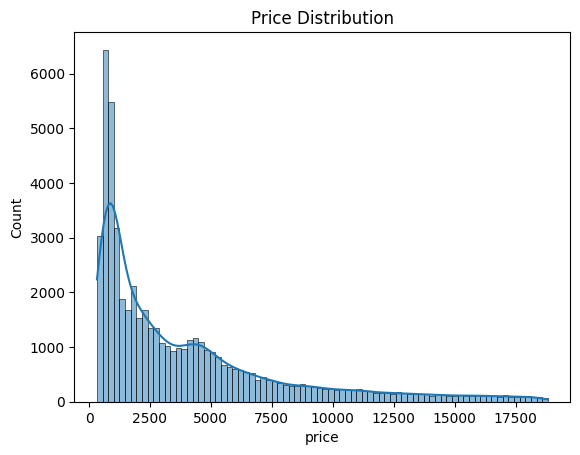

In [37]:
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

## Carat Distribution

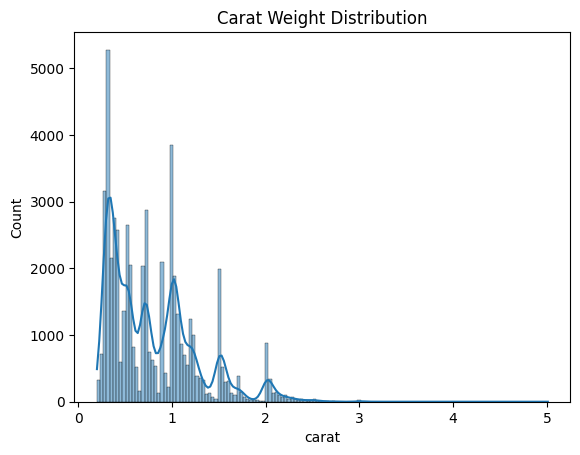

In [38]:
sns.histplot(df['carat'], kde=True)
plt.title('Carat Weight Distribution')
plt.show()

## Price vs Carat

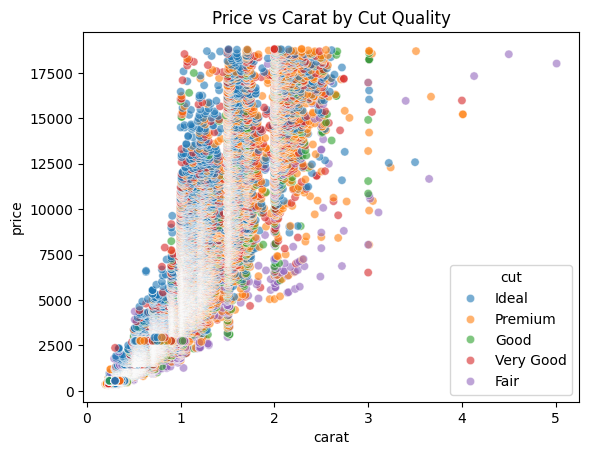

In [39]:
sns.scatterplot(x='carat', y='price', hue='cut', data=df, alpha=0.6)
plt.title('Price vs Carat by Cut Quality')
plt.show()

## Price by Cut Quality

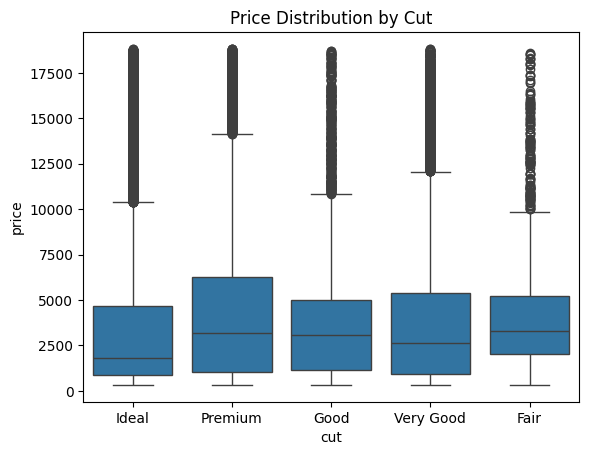

In [40]:
sns.boxplot(x='cut', y='price', data=df)
plt.title('Price Distribution by Cut')
plt.show()

## Price by Color

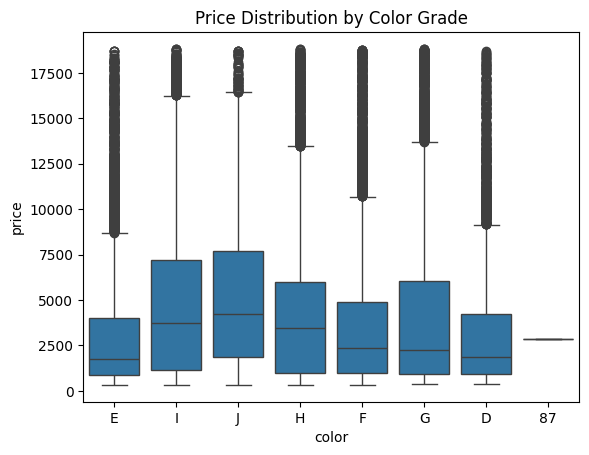

In [41]:
sns.boxplot(x='color', y='price', data=df)
plt.title('Price Distribution by Color Grade')
plt.show()

## Price by Clarity

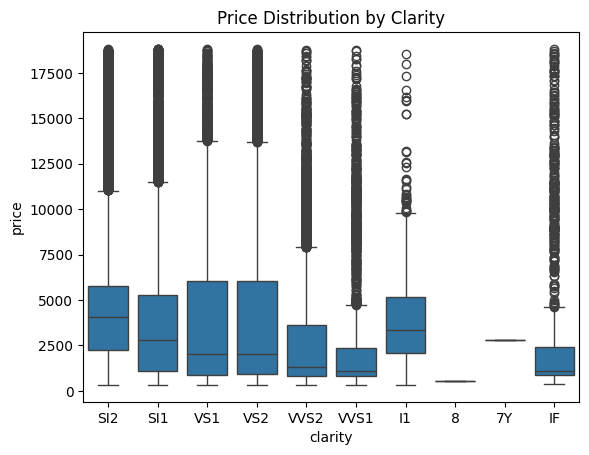

In [42]:
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Price Distribution by Clarity')
plt.show()

## Summary of EDA

The (Carat, Cut, Color, Clarity) all affect diamond pricing:

Carat is typically the strongest predictor of price
​

Color grades from D (colorless/best) to J (worst) - color D diamonds can be 60%+ more expensive than color H with same carat/clarity
​

Cut quality affects brilliance and value
​

Clarity measures internal flaws
​